In [2]:
%matplotlib inline
from PIL import Image
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def display_image(image, gray=True):
    plt.figure(figsize=(12, 6))
    if gray == True:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.show()

In [4]:
def custom_barplot(height, title):
    x = np.arange(len(height))
    plt.bar(x, height=height)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [5]:
def get_sum(img):
    x_sum = np.sum(img, axis=0) / img.shape[1]
    y_sum = np.sum(img, axis=1) / img.shape[0]
    return x_sum, y_sum

In [6]:
def distrib(img):
    x_sum, y_sum = get_sum(img)
    custom_barplot(y_sum, "Distrib pixel axe Y")
    custom_barplot(x_sum, "Distrib pixel axe X")

In [7]:
def get_variation(array):
    bounds = []
    b1 = 0
    b2 = 0
    flag = True
    for i, pixel in enumerate(array):
        if pixel > 4:
            if flag == True:
                b1 = i
                flag = False
        if pixel < 5:
            if flag == False:
                b2 = i-1
                bounds.append((b1, b2))
                flag = True
    if b2 == 0 or b1 != bounds[-1][0]:
        bounds.append((b1, len(array)-1))
    return bounds

In [8]:
def is_close_gap(tuple1, tuple2, treshold=100):
    if tuple2[0] - tuple1[1] < treshold:
        return True
    else:
        return False

In [9]:
def get_boundaries(tuple_array):
    tmp = tuple_array[0]
    bound = []
    for i in range(len(tuple_array)):
        if i+1 == len(tuple_array):
            break
        if is_close_gap(tuple_array[i], tuple_array[i+1]):
            tmp = (tmp[0], tuple_array[i+1][1])
        else:
            bound.append(tmp)
            tmp = tuple_array[i+1]
    bound.append(tmp)
    return bound

In [10]:
def remove_small_bound(tuple_array, treshold=100):
    diff = tuple_array[0][1] - tuple_array[0][0]
    tmp = tuple_array[0]
    for item in tuple_array:
        if diff < item[1] - item[0]:
            tmp = item
            diff = item[1] - item[0]
    return tmp

In [17]:
def get_cni_without_background(img, padding=0, verbose=False):
    img_inv = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    #if verbose: display_image(img_inv)
    x_sum, y_sum = get_sum(img_inv) # mean of each pixel by axis
    if verbose == True: print "X_SUM : {}  YSUM : {}".format(x_sum, y_sum)
    x_var = get_variation(x_sum) # get segments with spike on x axis
    if verbose == True: print "X_VAR : {}".format(x_var)
    y_var = get_variation(y_sum) # get segments with spike on y axis
    if verbose == True: print "Y_VAR : {}".format(y_var)
    x_bound = get_boundaries(x_var) # consolidate each segment
    if verbose == True: print "X_BOUND : {}".format(x_bound)
    y_bound = get_boundaries(y_var) # consolidate each segment
    if verbose == True: print "Y_BOUND : {}".format(y_bound)
    x_bound_final = remove_small_bound(x_bound)
    if verbose == True: print "X_BOUND_FINAL : {}".format(x_bound_final)
    y_bound_final = remove_small_bound(y_bound)
    if verbose == True: print "Y_BOUND_FINAL : {}".format(y_bound_final)
    cv2.rectangle(img, (x_bound_final[0] - padding, y_bound_final[0] - padding), (x_bound_final[1] + padding, y_bound_final[1] + padding), (0,255,0), 20)
    display_image(img)
    return img_inv, img

In [12]:
img = cv2.imread("CNI/{F23AAE02-06A9-4FD7-9490-0CA94E41D6C2}.pdf-0.png", 0)

In [507]:
img_inv = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

In [466]:
img = cv2.imread("CNI/" + ID[4], 0)

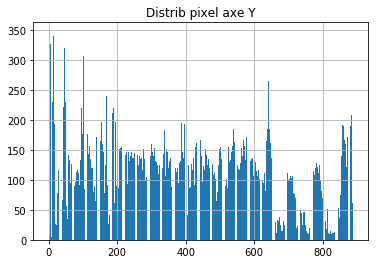

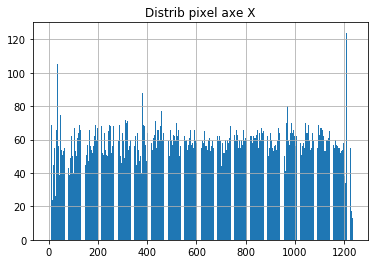

In [481]:
distrib(cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2))

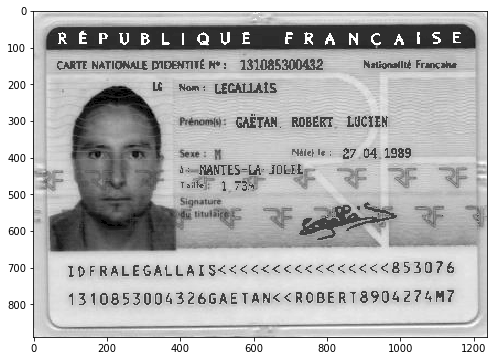

In [478]:
display_image(img)

In [14]:
ID = ["{DB169803-CBA9-4327-BE61-B14F1322389F}.pdf.png",
      "{DAE35603-BCB7-45BE-971A-549D074A6FC1}.pdf.png",
      "{DC216605-CF65-4E80-BF45-C1DAB04CA8ED}.pdf.png",
      "{DE32E502-5B06-4FFD-A365-EB75EDE23CB2}.pdf-0.png",
      "{DE04BC05-D0E5-44E0-B2AE-012C73CC4B90}.pdf.png"]

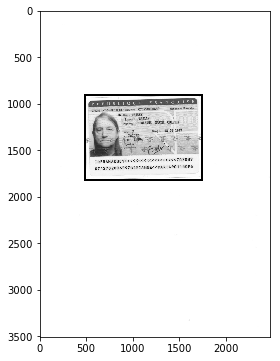

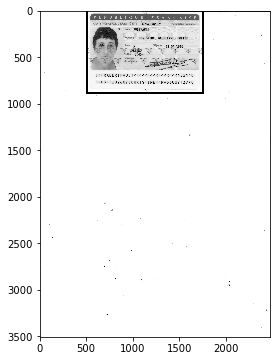

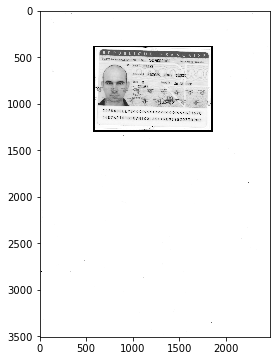

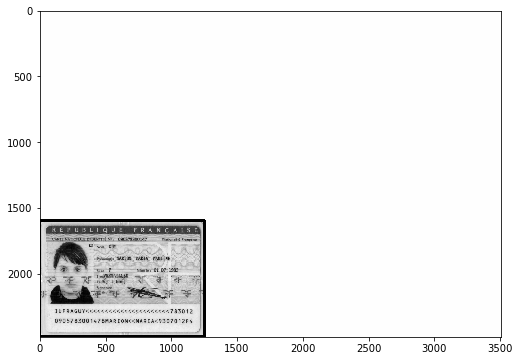

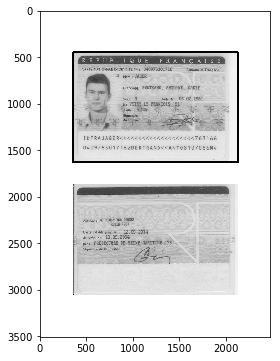

In [18]:
for id_img in ID:
    img = cv2.imread("CNI/" + id_img, 0)
    _, _ = get_cni_without_background(img, verbose=False)

{F23AAE02-06A9-4FD7-9490-0CA94E41D6C2}.pdf-0.png


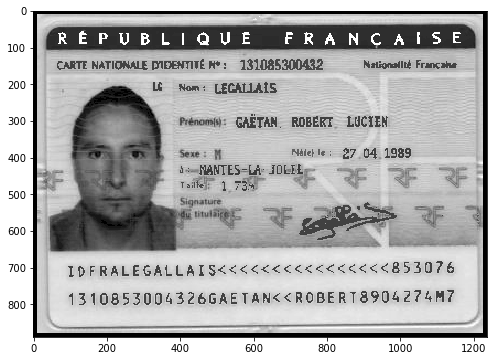

{F5351001-1D2A-4217-9906-080F766C7C1A}.pdf-0.png


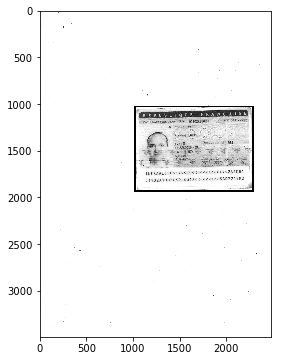

{F6428505-75D0-46CD-9285-7239CEE9757E}.pdf-0.png


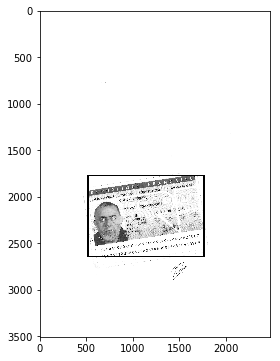

{F52A3E04-B670-403B-8B4C-88EE18CA6710}.pdf-0.png


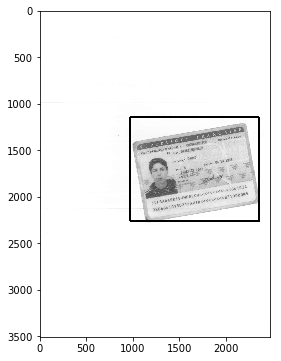

{F0649205-CC9C-4AD8-A8D2-C57D100EA88C}.pdf-0.png


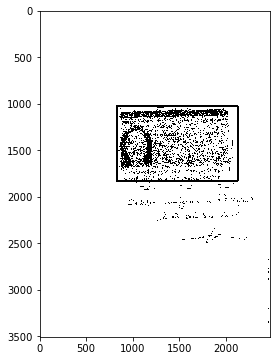

{D1880503-37F0-48B4-A4EB-2BE4F45BB9C6}.pdf-1.png


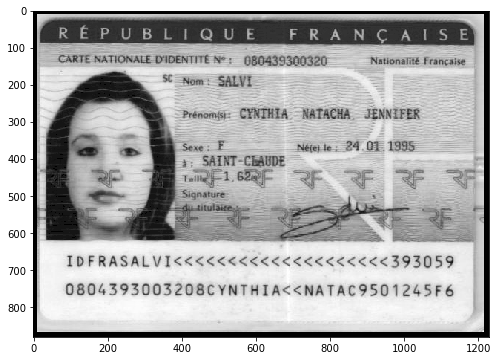

{CF5A1203-04FD-41EE-936A-66D4EC27D6DB}.pdf-0.png


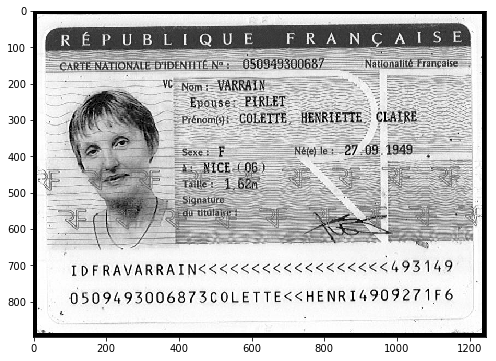

{D547F304-10F2-48B4-9E6A-A65FBC141B94}.pdf-0.png


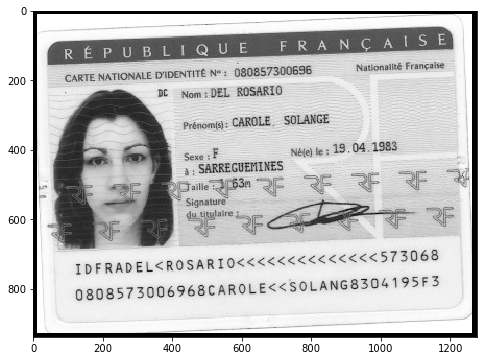

{F511DD05-1F30-4F70-9CEA-5881684006F4}.pdf.png


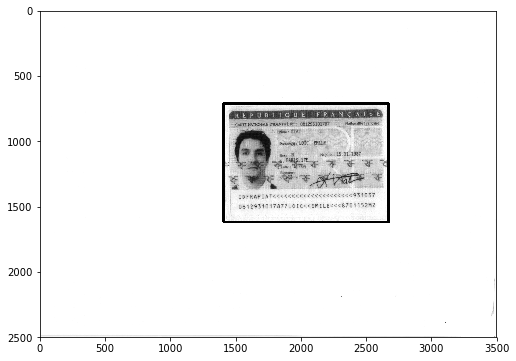

{F269F205-1EBE-4443-9DD4-8FDF4CB05157}.pdf-1.png


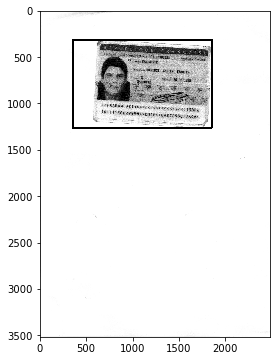

{E21D1C03-B2AF-45B0-9DBC-3B211723CA3E}.pdf-0.png


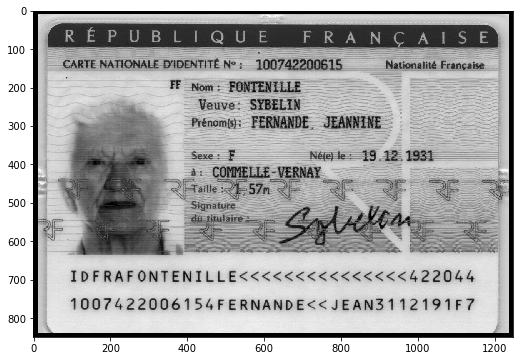

{DCE4B802-B6ED-42A1-BB7B-F97B9A25D74C}.pdf.png


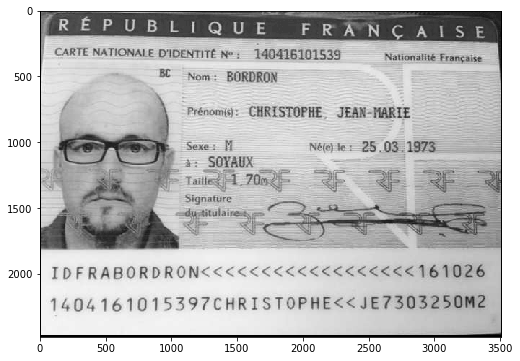

{F5E4A404-B230-4498-B1D3-D30C42FFB0C3}.pdf.png


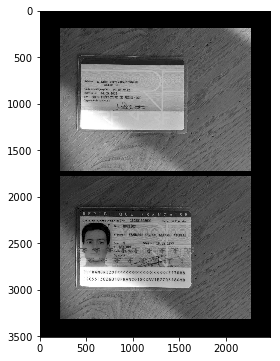

{F189D505-D42C-4B73-AB69-249B60355D61}.pdf-0.png


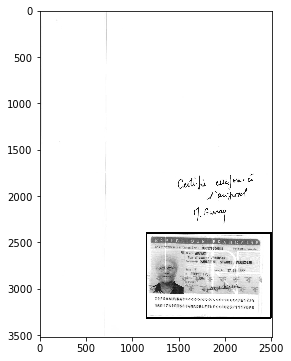

{F634F204-B1A0-403D-AA71-61A54CC66653}.pdf-1.png


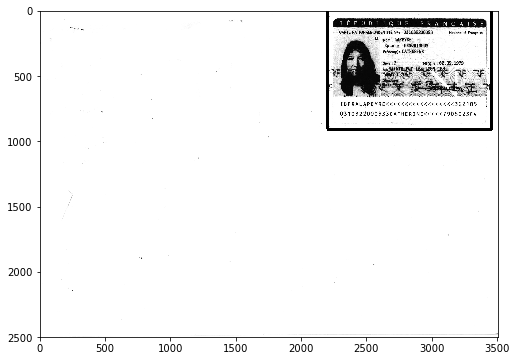

{DA594D04-6E70-47FF-A418-79504776E882}.pdf-0.png


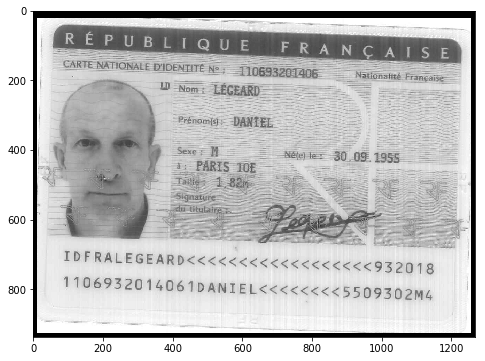

{DF827F00-2317-443E-8923-66E49C92F880}.pdf-0.png


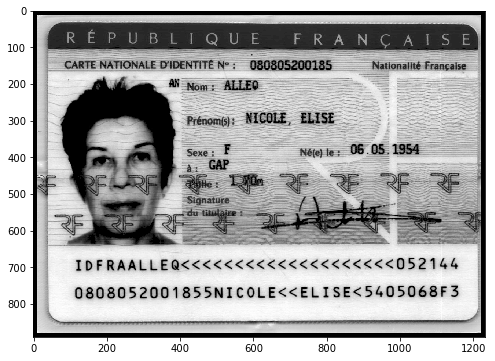

{E55C9402-39E5-4156-B00C-CECB63AFC4C9}.pdf-0.png


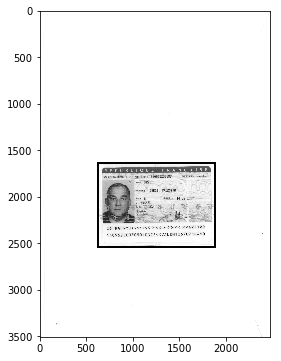

{F24A9104-F038-4A93-B53C-46375F9276CA}.pdf-0.png


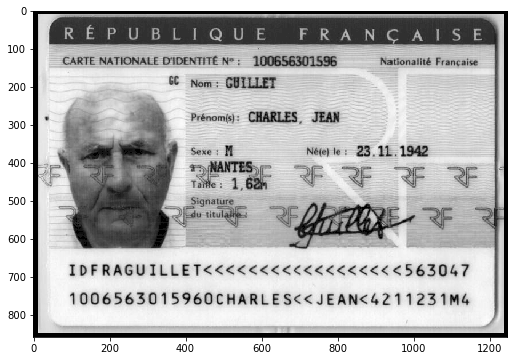

{E3010403-2947-4D5E-8AE0-C14F944D7BE5}.pdf-1.png


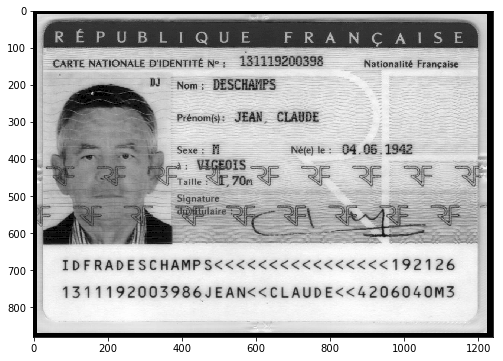

{D5389A00-9B63-4205-829E-C3BB6A242F56}.pdf-0.png


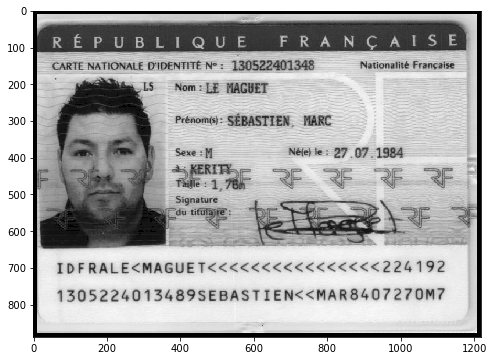

{DDEC6201-02BE-4DD6-A015-39DCE5BBC737}.pdf-0.png


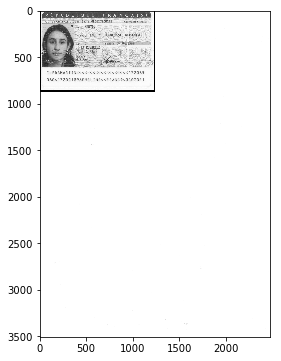

{D9E30503-E5CC-4215-A8DC-DB1174546766}.pdf.png


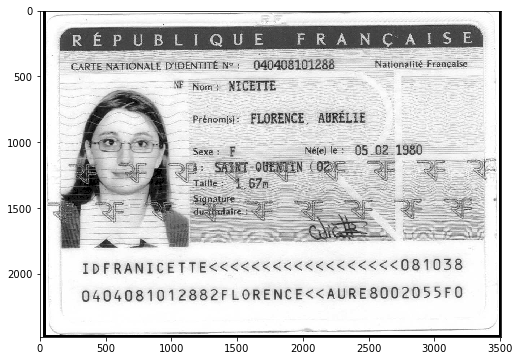

{F686AC00-D951-4053-B17E-1CC709DF9B91}.pdf-0.png


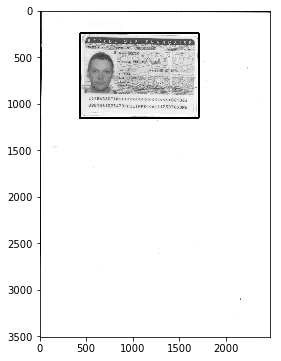

{F331BB02-5B05-4A97-BC7B-6B6451FAA31D}.pdf-0.png


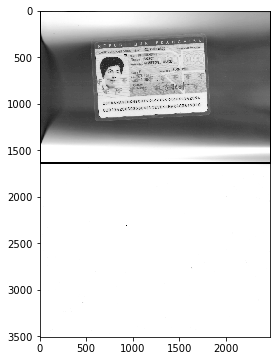

{F7FC6B00-7B5C-41AE-953D-10DEA0D98B45}.pdf-0.png


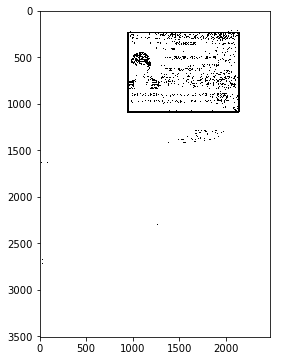

{D32E0306-D174-4EBB-93DC-14E13DF39825}.pdf-0.png


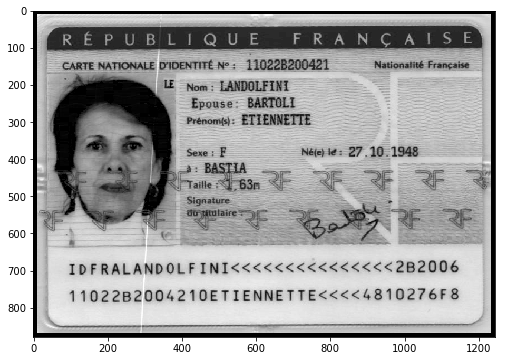

{DE04BC05-D0E5-44E0-B2AE-012C73CC4B90}.pdf.png


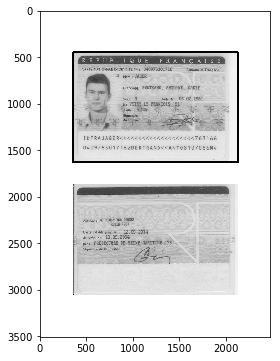

{F50F5801-E9FA-4C3C-9A60-FEE16C5E3045}.pdf.png


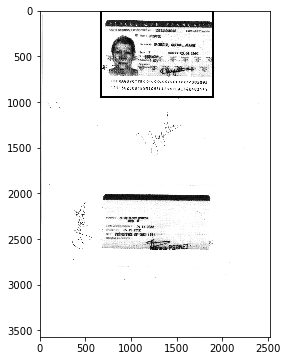

{E1AFE702-DE90-44CB-BACB-1FB71346229C}.pdf-0.png


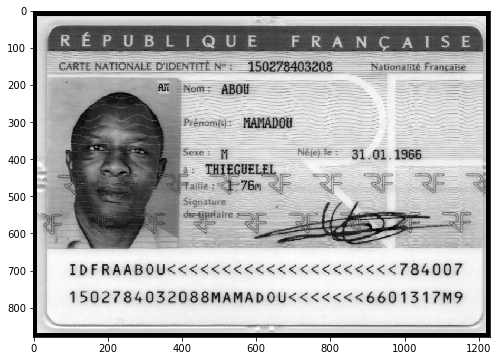

{F7781101-8F04-4BC4-A3E5-3EF39633277C}.pdf.png


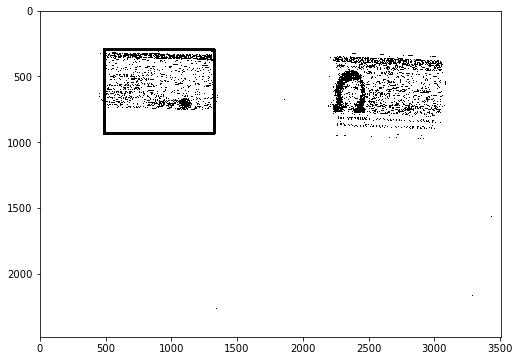

{F796EB03-43A3-47D9-A899-B3896C4CFE1C}.pdf-0.png


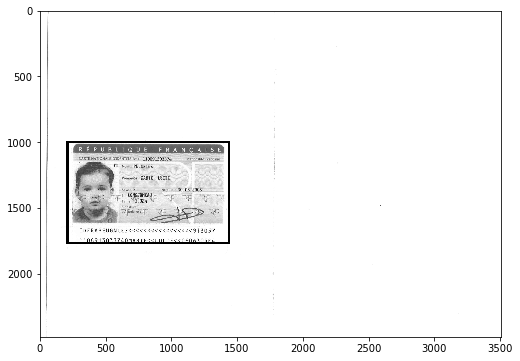

{E9DF5301-37F7-4906-8DB1-C03B734098CB}.pdf-0.png


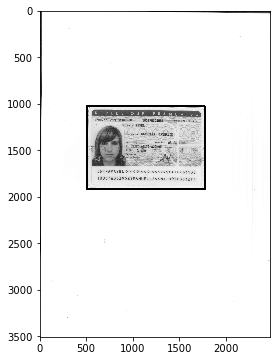

{F37AC000-EC17-49B0-BC4A-D5BD003F9C62}.pdf-0.png


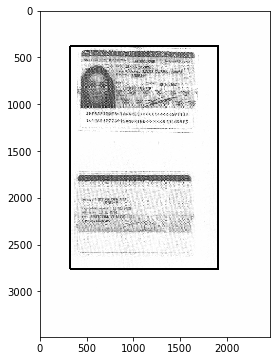

{F396AB01-A8CD-40DE-A94F-0AA2560FF765}.pdf-0.png


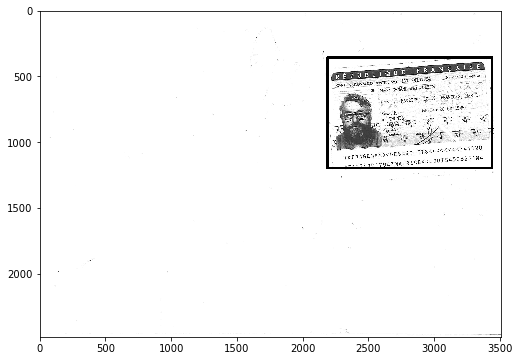

{D2B98C04-3486-48BC-9973-5CCB9309D4F0}.pdf-1.png


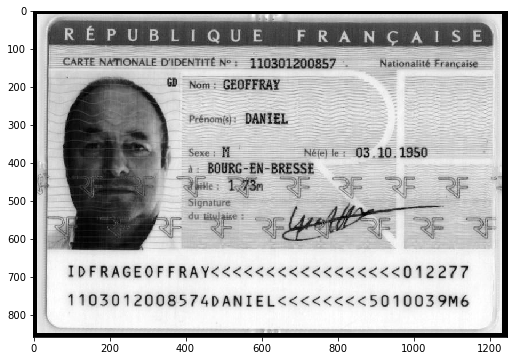

{DB169803-CBA9-4327-BE61-B14F1322389F}.pdf.png


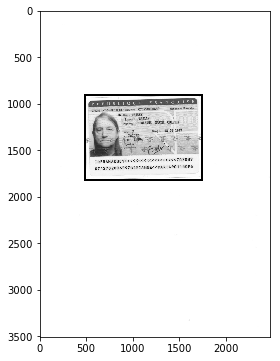

{CE055B05-AEA7-49F8-A0FF-89E89DC08626}.pdf.png


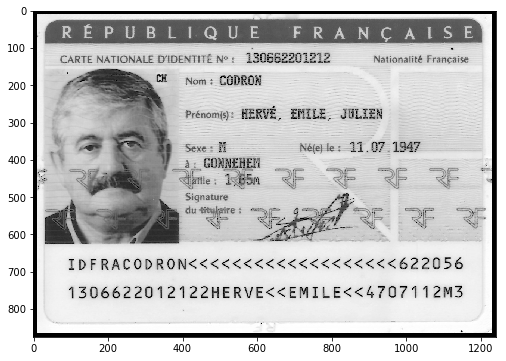

{F424B000-5BC0-4106-A7B3-A428B491B085}.pdf.png


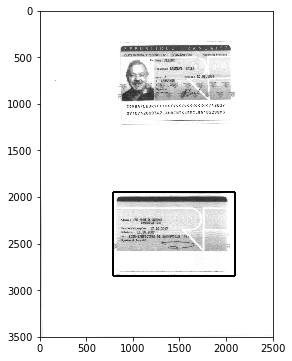

{F716FC03-9706-4DDB-A7A3-ED0C43F4C840}.pdf.png


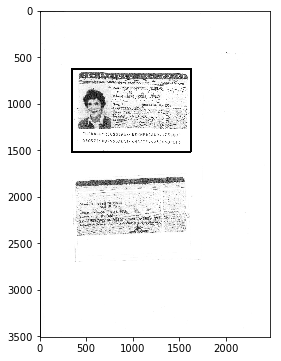

{F72C9700-689C-4A3B-82A8-61EE3C651937}.pdf.png


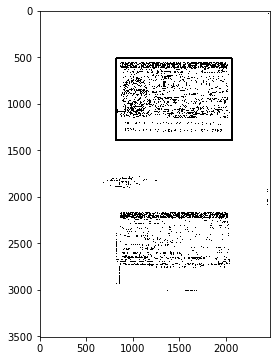

{C8582003-3597-4D2E-94C6-148563300635}.pdf-0.png


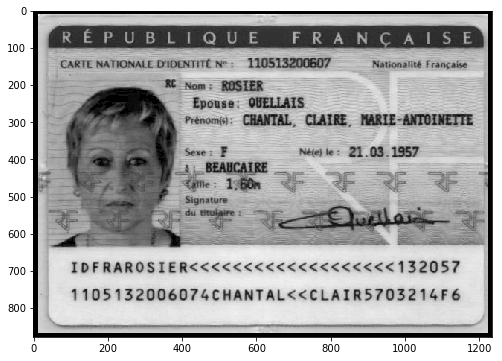

{F40D1600-C6E6-4FA4-9C86-0B01E88D45DA}.pdf.png


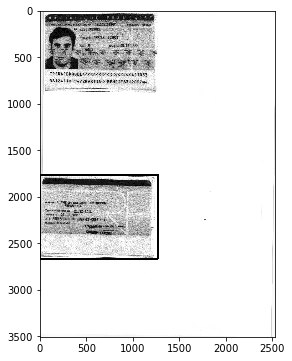

{E1D3D205-79E1-40F1-8351-3DC2162721A4}.pdf-0.png


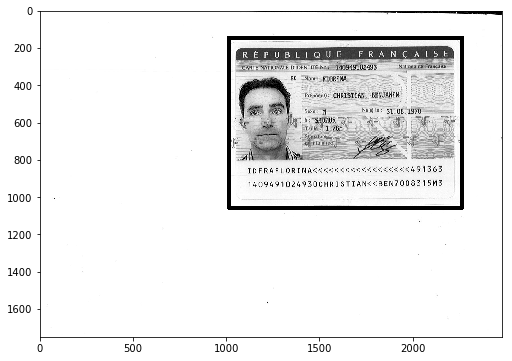

{F22A2F00-1679-4667-B695-1B89D1DD40C2}.pdf-0.png


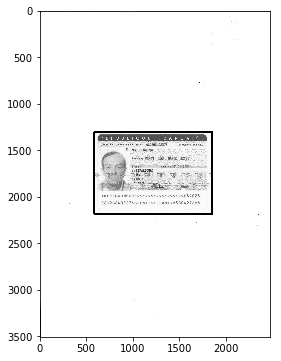

{F2131404-A22F-488E-9BD6-DA78FD71DB4E}.pdf-0.png


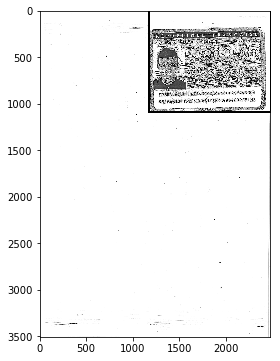

{D8B92C04-82B9-4FBB-A340-3480CA47B14E}.pdf-0.png


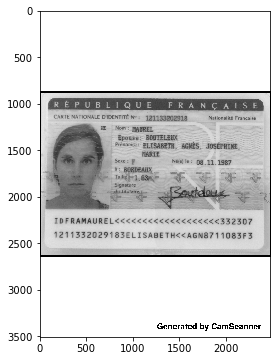

{CC3FC205-9BF1-45F3-81AC-5F98C8A94EB6}.pdf-0.png


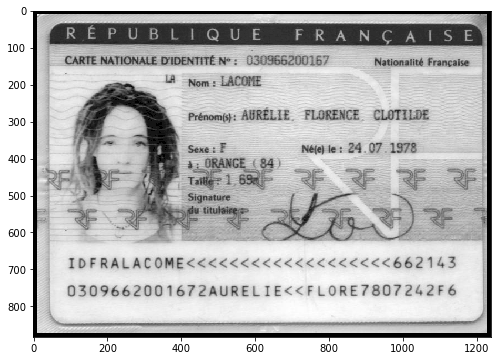

{D0B0E703-6BEF-479F-8AF5-1BC35572AA2F}.pdf-0.png


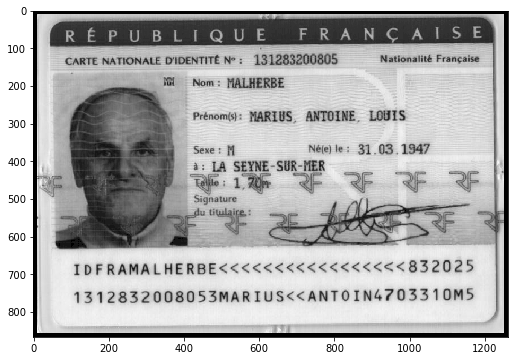

{CCD01801-2EDE-4051-B378-46DD6A5CA0C9}.pdf.png


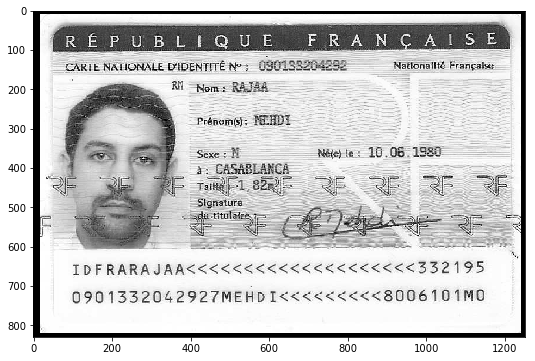

{E2BA8904-D8F0-406B-982A-13386290A660}.pdf-1.png


In [19]:
for i, path in enumerate(os.listdir("CNI/")):
    print path
    if i == 50:
        break
    img = cv2.imread("CNI/" + path, 0)
    _, _ = get_cni_without_background(img, verbose=False)

In [82]:
img_inv = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY_INV)

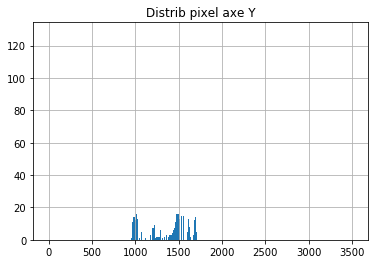

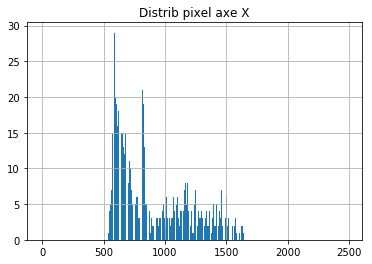

In [70]:
distrib(img_inv[1])

In [77]:
x_sum, y_sum = get_sum(img_inv[1])

In [104]:
x_bound = get_index_bound(x_sum)
y_bound = get_index_bound(y_sum)

In [105]:
x_bound

(543, 1936)

In [106]:
y_bound

(4, 3504)

In [111]:
x_sum

array([0, 0, 0, ..., 0, 0, 0], dtype=uint64)

In [151]:
x_var = get_variation(x_sum)

In [152]:
x_var

[(540, 785),
 (789, 1520),
 (1527, 1550),
 (1554, 1556),
 (1560, 1583),
 (1587, 1610),
 (1617, 1643),
 (1653, 1655)]

In [153]:
y_var = get_variation(y_sum)

In [154]:
y_var

[(4, 9),
 (955, 1035),
 (1048, 1086),
 (1111, 1137),
 (1153, 1161),
 (1165, 1182),
 (1189, 1569),
 (1588, 1641),
 (1663, 1713)]

In [155]:
get_boundaries(x_var)

[(540, 1655)]

In [156]:
get_boundaries(y_var)

[(4, 9), (955, 1713)]

In [8]:
import re

In [9]:
re.search('{[A-Z0-9-]*}', "CNI/{F23AAE02-06A9-4FD7-9490-0CA94E41D6C2}.pdf-0.png").group(0)

'{F23AAE02-06A9-4FD7-9490-0CA94E41D6C2}'

In [113]:
get_white(x_sum)

[(0, 539),
 (786, 788),
 (1521, 1526),
 (1551, 1553),
 (1557, 1559),
 (1584, 1586),
 (1611, 1616),
 (1644, 1652)]

In [114]:
get_white(y_sum)

[(0, 3),
 (10, 954),
 (1036, 1047),
 (1087, 1110),
 (1138, 1152),
 (1162, 1164),
 (1183, 1188),
 (1570, 1587),
 (1642, 1662)]